# HW2: Feature extraction based on linear independence and analysis of its impact on the loss function optimization process

Course: Computational Data Mining

Student: Mahdi Heydari | sn: 404112060

## 0: Importing libraries and packages

In [116]:
import pandas as pd
import numpy as np
from sklearn.datasets import (
    load_breast_cancer,
    fetch_california_housing, # The modern replacement for Boston Housing
    load_iris
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## 1: Loading Datasets

### 1.1: (Classification) Wisconsin Breast Cancer

In [5]:
#loading features data and targets
cancer_data = load_breast_cancer(as_frame=True)
X_class = cancer_data.data
y_class = cancer_data.target

In [6]:
print("Wisconsin Breast Cancer Dataset Summary\n","="*50)
print("# X_class info:")
print(X_class.shape[0],"samples, ", X_class.shape[1],"features")
print("features list: \n", list(X_class.columns))

print("- "*30)
print("# y_class info:")
print("Target (y): \n", cancer_data.target_names[0], " (0) or ", cancer_data.target_names[1]," (1)")
print(y_class.value_counts())
# X_class.info()
# print(X_class.describe())

print("- "*30)
print("# Features description")
X_class.info()

Wisconsin Breast Cancer Dataset Summary
# X_class info:
569 samples,  30 features
features list: 
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# y_class info:
Target (y): 
 malignant  (0) or  benign  (1)
target
1    357
0    212
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Features description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 

### 1.2: (Regression) Boston Housing

In [7]:
#loading features data and targets
housing_data = fetch_california_housing(as_frame=True)
X_reg = housing_data.data
y_reg = housing_data.target

In [8]:
print("Boston Housing Dataset Summary\n","="*50)
print("# X_reg info:")
print(X_reg.shape[0],"samples, ", X_reg.shape[1],"features")
print("features: \n", list(X_reg.columns))

print("- "*30)
print("# y_reg info:")
print("Target (y): ", housing_data.target_names[0])

print("- "*30)
y_reg.info()
print("- "*30)
X_reg.describe()

Boston Housing Dataset Summary
# X_reg info:
20640 samples,  8 features
features: 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# y_reg info:
Target (y):  MedHouseVal
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### 1.3: (Clustring) UCI Iris

In [9]:
# Loading features data and targets
iris_data = load_iris(as_frame=True)
X_clust = iris_data.data
y_clust = iris_data.target

In [10]:
print("UCI Iris Dataset Summary\n","="*50)
print("# X_reg info:")
print(X_clust.shape[0],"samples, ", X_clust.shape[1],"features")
print("features: \n", list(X_clust.columns))
print("- "*30)
print("# y_reg info:")
print("Target (y): ", iris_data.target_names)
print(y_clust.value_counts())

print("- "*30)
X_clust.info()
X_clust.describe()

UCI Iris Dataset Summary
# X_reg info:
150 samples,  4 features
features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# y_reg info:
Target (y):  ['setosa' 'versicolor' 'virginica']
target
0    50
1    50
2    50
Name: count, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2: Initial Collinearity Check

### 2.1: Scaling for Covariance
Using StandardScaler to handle scale-dependency of Covariance Matrix
(Values of scaled matrices will be in (-1,1) range)

In [11]:
scaler = StandardScaler()

# Scale all datasets
X_class_scaled = scaler.fit_transform(X_class)
X_reg_scaled = scaler.fit_transform(X_reg)
X_clust_scaled = scaler.fit_transform(X_clust)

# Re-create DataFrames (needed for labeled heatmaps)
X_class_scaled_df = pd.DataFrame(X_class_scaled, columns=X_class.columns)
X_reg_scaled_df = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)
X_clust_scaled_df = pd.DataFrame(X_clust_scaled, columns=X_clust.columns)

Most & Least correlations function:
this function will be used to return most and least correlation values.

In [12]:
def get_extreme_correlations(corr_matrix, n=3):

    corr_series = corr_matrix.copy().unstack()
    corr_series = corr_series.drop_duplicates() # Drop duplicate pairs

    # Remove self-correlations (which are 1.0)
    corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

    # Sort
    sorted_corr = corr_series.sort_values(ascending=False)

    print(f"Top {n} Most POSITIVE correlations:")
    print(sorted_corr.head(n))
    print(f"\nTop {n} Most NEGATIVE correlations:")
    print(sorted_corr.tail(n))
    return sorted_corr

### 2.2: Classification (Breast Cancer) Heatmap

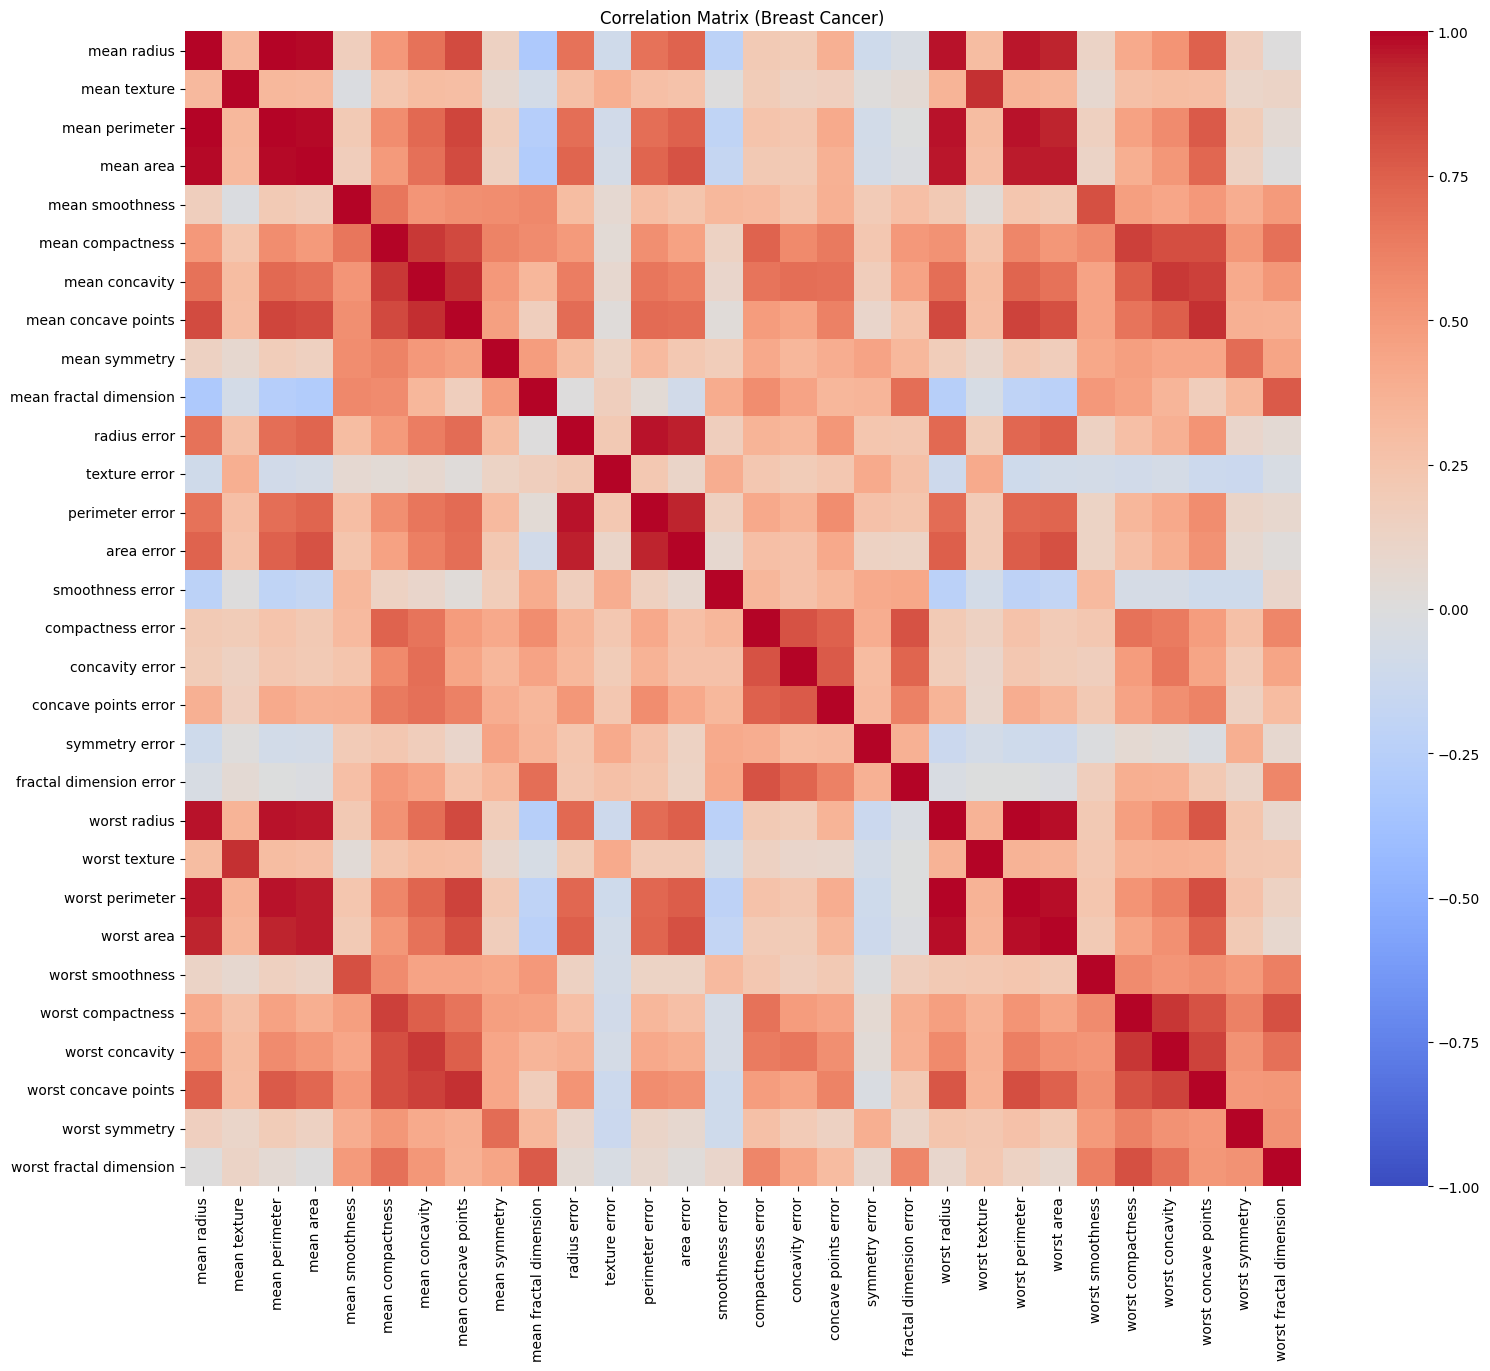

>>> Analysis (Breast Cancer)
Top 5 Most POSITIVE correlations:
mean radius     mean perimeter     0.997855
worst radius    worst perimeter    0.993708
mean radius     mean area          0.987357
mean perimeter  mean area          0.986507
worst radius    worst area         0.984015
dtype: float64

Top 5 Most NEGATIVE correlations:
mean fractal dimension  worst area               -0.231854
                        worst radius             -0.253691
mean perimeter          mean fractal dimension   -0.261477
mean area               mean fractal dimension   -0.283110
mean radius             mean fractal dimension   -0.311631
dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Examples:
 - 'mean radius' & 'mean perimeter': 0.9979
 - 'mean radius' & 'mean area': 0.9874
 - 'worst texture' & 'mean texture': 0.9120


In [13]:
# Correlation matrix
corr_matrix_class = X_class_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix_class, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Breast Cancer)')
plt.show()

# Analysis (Documentation)
print(">>> Analysis (Breast Cancer)")
sorted_corr = get_extreme_correlations(corr_matrix_class, n=5)
print("- "*30)
print("Examples:")
print(f" - 'mean radius' & 'mean perimeter': {corr_matrix_class.loc['mean radius', 'mean perimeter']:.4f}")
print(f" - 'mean radius' & 'mean area': {corr_matrix_class.loc['mean radius', 'mean area']:.4f}")
print(f" - 'worst texture' & 'mean texture': {corr_matrix_class.loc['worst texture', 'mean texture']:.4f}")

### 2.3: Regression (California Housing) Heatmap

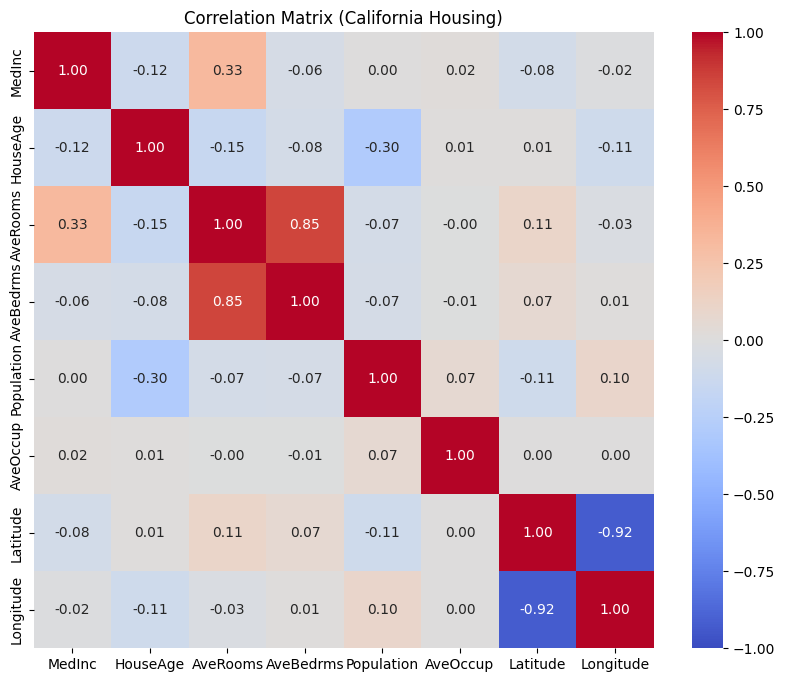

>>> Analysis (California Housing)
Top 3 Most POSITIVE correlations:
AveRooms  AveBedrms    0.847621
MedInc    AveRooms     0.326895
AveRooms  Latitude     0.106389
dtype: float64

Top 3 Most NEGATIVE correlations:
HouseAge  AveRooms     -0.153277
          Population   -0.296244
Latitude  Longitude    -0.924664
dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Highest Positive  0.8476213257130477 : 'AveRooms' & 'AveBedrms' (Logically dependent).
Highest Negative  -0.9246644339150445 : 'Latitude' & 'Longitude' (Geographic constraint).


/tmp/ipython-input-2493805625.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Highest Positive ",_[0],": 'AveRooms' & 'AveBedrms' (Logically dependent).")
/tmp/ipython-input-2493805625.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Highest Negative ",_[-1],": 'Latitude' & 'Longitude' (Geographic constraint).")


In [14]:
# 1. Calculate the correlation matrix
corr_matrix_reg = X_reg_scaled_df.corr()

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (California Housing)')
plt.show()

# 3. Analysis (Documentation)
print(">>> Analysis (California Housing)")
_ = get_extreme_correlations(corr_matrix_reg, n=3)

print("- "*30)
print("Highest Positive ",_[0],": 'AveRooms' & 'AveBedrms' (Logically dependent).")
print("Highest Negative ",_[-1],": 'Latitude' & 'Longitude' (Geographic constraint).")

### 2.4: Clustering (Iris) Heatmap

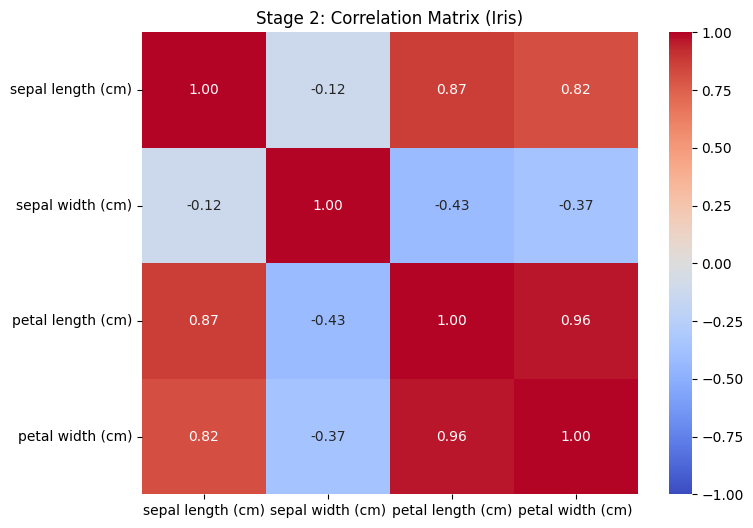

>>> Analysis (Iris) ---
Top 3 Most POSITIVE correlations:
petal length (cm)  petal width (cm)     0.962865
sepal length (cm)  petal length (cm)    0.871754
                   petal width (cm)     0.817941
dtype: float64

Top 3 Most NEGATIVE correlations:
sepal length (cm)  sepal width (cm)    -0.117570
sepal width (cm)   petal width (cm)    -0.366126
                   petal length (cm)   -0.428440
dtype: float64


In [17]:
# Calculate the correlation matrix
corr_matrix_clust = X_clust_scaled_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_clust, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Stage 2: Correlation Matrix (Iris)')
plt.show()

# Analysis (Documentation)
print(">>> Analysis (Iris) ---")
_ = get_extreme_correlations(corr_matrix_clust, n=3)

**Analysis:** The heatmap confirms strong collinearity.
* `petal length (cm)` & `petal width (cm)`: **0.96**
* `petal length (cm)` & `sepal length (cm)`: **0.87**
This indicates feature redundancy. PCA should be highly effective at reducing these 4 dimensions.

### 2.5: Ananlysis summary

## 3: Feature Extraction (PCA, ICA, SVD)
**Goal:** Project the original, correlated features into a new, smaller, linearly independent feature space, as required by the assignment.
**Method:** We will use PCA, ICA, and SVD. For PCA/SVD, we will target 95% explained variance.


### 3.1: Clasification (Cancer)


In [59]:
# Cancer:
print(f"Original shape: {X_class_scaled.shape}\n")

print("- "*30)
# PCA
pca_class = PCA(n_components=0.95, random_state=21)
X_class_pca = pca_class.fit_transform(X_class_scaled)
n_components_cancer = pca_class.n_components_
print(f"PCA shape: {X_class_pca.shape} (n={n_components_cancer})")
print(f"PCA Total Variance Explained: {np.sum(pca_class.explained_variance_ratio_):.4f}")
print(f"PCA Variance per component: {np.round(pca_class.explained_variance_ratio_, 3)}")


print("- "*30)
# ICA
ica_class = FastICA(n_components=n_components_cancer, random_state=21, max_iter=1000, tol=0.01)
X_class_ica = ica_class.fit_transform(X_class_scaled)
print(f"ICA shape: {X_class_ica.shape}")

print("- "*30)
# SVD
svd_class = TruncatedSVD(n_components=n_components_cancer, random_state=21)
X_class_svd = svd_class.fit_transform(X_class_scaled)
print(f"SVD shape: {X_class_svd.shape}")
print(f"SVD Total Variance Explained: {np.sum(svd_class.explained_variance_ratio_):.4f}")
print(f"SVD Variance per component: {np.round(svd_class.explained_variance_ratio_, 3)}")




Original shape: (569, 30)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PCA shape: (569, 10) (n=10)
PCA Total Variance Explained: 0.9516
PCA Variance per component: [0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012]
PCA Mean Off-Diagonal Correlation: 0.000000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ICA shape: (569, 10)
ICA Mean Off-Diagonal Correlation: 0.000000
ICA Component Kurtosis (non-Gaussian): [ 7.1   8.56  0.91 53.07  1.45  3.35  1.28  6.17 26.5   6.23]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SVD shape: (569, 10)
SVD Total Variance Explained: 0.9516
SVD Variance per component: [0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012]
SVD Mean Off-Diagonal Correlation: 0.000000


### 3.2: Regression (Housing)

In [46]:
# Housing
print(f"Original shape: {X_reg_scaled.shape}")

print("- "*30)
# PCA
pca_reg = PCA(n_components=0.95, random_state=42)
X_reg_pca = pca_reg.fit_transform(X_reg_scaled)
n_components_housing = pca_reg.n_components_
print(f"PCA shape: {X_reg_pca.shape} (n={n_components_housing})")
print(f"PCA Total Variance Explained: {np.sum(pca_reg.explained_variance_ratio_):.4f}")
print(f"PCA Variance per component: {np.round(pca_reg.explained_variance_ratio_, 3)}")

print("- "*30)
# ICA
ica_reg = FastICA(n_components=n_components_housing, random_state=42, max_iter=1000, tol=0.01)
X_reg_ica = ica_reg.fit_transform(X_reg_scaled)
print(f"ICA shape: {X_reg_ica.shape}")

print("- "*30)
# SVD
svd_reg = TruncatedSVD(n_components=n_components_housing, random_state=42)
X_reg_svd = svd_reg.fit_transform(X_reg_scaled)
print(f"SVD shape: {X_reg_svd.shape}")
print(f"SVD Total Variance Explained: {np.sum(svd_reg.explained_variance_ratio_):.4f}")
print(f"SVD Variance per component: {np.round(svd_reg.explained_variance_ratio_, 3)}")


Original shape: (20640, 8)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PCA shape: (20640, 6) (n=6)
PCA Total Variance Explained: 0.9841
PCA Variance per component: [0.253 0.235 0.159 0.129 0.125 0.082]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ICA shape: (20640, 6)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SVD shape: (20640, 6)
SVD Total Variance Explained: 0.9841
SVD Variance per component: [0.253 0.235 0.159 0.129 0.125 0.082]


### 3.3: Clustring (Iris)

In [48]:
# Iris
print(f"Original shape: {X_clust_scaled.shape}")
n_components_clust = 2

print("- "*30)
# PCA
pca_clust = PCA(n_components=n_components_clust, random_state=42)
X_clust_pca = pca_clust.fit_transform(X_clust_scaled)
print(f"PCA shape: {X_clust_pca.shape}")
print(f"PCA Total Variance Explained: {np.sum(pca_clust.explained_variance_ratio_):.4f}")
print(f"PCA Variance per component: {np.round(pca_clust.explained_variance_ratio_, 3)}")

print("- "*30)
# ICA
ica_clust = FastICA(n_components=n_components_clust, random_state=42)
X_clust_ica = ica_clust.fit_transform(X_clust_scaled)
print(f"ICA shape: {X_clust_ica.shape}")

print("- "*30)
# SVD
svd_clust = TruncatedSVD(n_components=n_components_clust, random_state=42)
X_clust_svd = svd_clust.fit_transform(X_clust_scaled)
print(f"SVD shape: {X_clust_svd.shape}")
print(f"SVD Total Variance Explained: {np.sum(svd_clust.explained_variance_ratio_):.4f}")
print(f"SVD Variance per component: {np.round(svd_clust.explained_variance_ratio_, 3)}")

Original shape: (150, 4)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PCA shape: (150, 2)
PCA Total Variance Explained: 0.9581
PCA Variance per component: [0.73  0.229]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ICA shape: (150, 2)
ICA Note: Components maximize independence, not variance.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SVD shape: (150, 2)
SVD Total Variance Explained: 0.9581
SVD Variance per component: [0.73  0.229]


## 4: Applying Basic Feature Selection

### 4.1: Classification


In [122]:
# >>> RFE (chosen method)

print("RFE: Classification (Cancer)")
estimator_class = RandomForestClassifier(random_state=42)
rfe_class = RFE(estimator=estimator_class, n_features_to_select=10)
X_class_selected = rfe_class.fit_transform(X_class_scaled_df, y_class)

print("- "*30)
# Analysis & Sanity Check
selected_features_class = X_class_scaled_df.columns[rfe_class.support_]
print(f"Original shape: {X_class_scaled_df.shape}")
print(f"Selected shape: {X_class_selected.shape}")
print(f"RFE kept these 10 features: {list(selected_features_class)}")

print("- "*30)
# (Optional) Comparison with SelectKBest
print("SelectKBest: Classification (Cancer)")
skb_class = SelectKBest(score_func=f_classif, k=10)
skb_class.fit(X_class_scaled_df, y_class)
skb_features_class = X_class_scaled_df.columns[skb_class.get_support()]
print(f"SelectKBest kept these 10 features: {list(skb_features_class)}")


RFE: Classification (Cancer)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Original shape: (569, 30)
Selected shape: (569, 10)
RFE kept these 10 features: ['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SelectKBest: Classification (Cancer)
SelectKBest kept these 10 features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


**Analysis (RFE vs. SelectKBest):**
To provide a fair comparison against the 10 components from PCA, we used `RFE` to select the top 10 *original* features.

* **RFE Kept:** `['mean perimeter', 'mean area', 'mean concavity', ...]`
* **SelectKBest Kept:** `['mean radius', 'mean perimeter', 'mean area', ...]`

The `SelectKBest` subset includes features we *know* are highly collinear (e.g., `mean radius`, `mean perimeter`). The `RFE` subset appears to be a better-selected group, which aligns with `RFE` being a more advanced (wrapper) method.

### 4.2: Regression

In [67]:
# >>> RFE (chosen method)
print("RFE: Regression (Housing)")
estimator_reg = LinearRegression()
rfe_reg = RFE(estimator=estimator_reg, n_features_to_select=6)
X_reg_selected = rfe_reg.fit_transform(X_reg_scaled_df, y_reg)

print("- "*30)
# Analysis & Sanity Check
selected_features_reg = X_reg_scaled_df.columns[rfe_reg.support_]
print(f"Original shape: {X_reg_scaled_df.shape}")
print(f"Selected shape: {X_reg_selected.shape}")
print(f"RFE kept these 6 features: {list(selected_features_reg)}")

print("- "*30)
# (Optional) Comparison with SelectKBest
print("SelectKBest: Regression (Housing)")
skb_reg = SelectKBest(score_func=f_regression, k=6)
skb_reg.fit(X_reg_scaled_df, y_reg)
skb_features_reg = X_reg_scaled_df.columns[skb_reg.get_support()]
print(f"SelectKBest kept these 6 features: {list(skb_features_reg)}")

print("- "*30)
print("\n>>> Same result")


RFE: Regression (Housing)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Original shape: (20640, 8)
Selected shape: (20640, 6)
RFE kept these 6 features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SelectKBest: Regression (Housing)
SelectKBest kept these 6 features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

>>> Same result


## 5: Training Models & Analyzing Optimization

### 5.1: Setup - Train-Test Split

In [73]:
# >>> Regression (Housing) Data Splits
X_reg_train_orig, X_reg_test_orig, y_reg_train, y_reg_test = train_test_split(
    X_reg_scaled_df, y_reg, test_size=0.2, random_state=21
)

#pca (step3)
X_reg_train_pca, X_reg_test_pca, _, _ = train_test_split(
    X_reg_pca, y_reg, test_size=0.2, random_state=21
)

# rfe (step 4)
X_reg_train_rfe, X_reg_test_rfe, _, _ = train_test_split(
    X_reg_selected, y_reg, test_size=0.2, random_state=21
)
print("All datasets are split with a consistent random_state=21.")

All datasets are split with a consistent random_state=21.


In [74]:
# >>> Classification (Cancer) Data Splits
X_class_train_orig, X_class_test_orig, y_class_train, y_class_test = train_test_split(
    X_class_scaled_df, y_class, test_size=0.2, random_state=21, stratify=y_class
)

#pca (step3)
X_class_train_pca, X_class_test_pca, _, _ = train_test_split(
    X_class_pca, y_class, test_size=0.2, random_state=21, stratify=y_class
)
# rfe (step 4)
X_class_train_rfe, X_class_test_rfe, _, _ = train_test_split(
    X_class_selected, y_class, test_size=0.2, random_state=21, stratify=y_class
)

Clustering (Iris) Data: No split needed. KMeans is unsupervised and will run on the full datasets.


### 5.2: Regression


#### 5.2.1: Model 1 - Analytical Solution (LinearRegression)

In [79]:
# Train on Original (Collinear) Data
lr_orig = LinearRegression().fit(X_reg_train_orig, y_reg_train)
mse_orig = mean_squared_error(y_reg_test, lr_orig.predict(X_reg_test_orig))

# Train on PCA (Orthogonal) Data
lr_pca = LinearRegression().fit(X_reg_train_pca, y_reg_train)
mse_pca = mean_squared_error(y_reg_test, lr_pca.predict(X_reg_test_pca))

# Analysis: Coefficient Comparison
print(f"Test MSE (Original): {mse_orig:.4f}")
print(f"Test MSE (PCA): {mse_pca:.4f}\n")

print("- "*30)
print("--- Coefficient Analysis ---")
coeffs_orig = pd.Series(lr_orig.coef_, index=X_reg_train_orig.columns)
print("Original Data Coefficients:\n", coeffs_orig.sort_values(ascending=False))

print("- "*30)
coeffs_pca = pd.Series(lr_pca.coef_, index=[f"PC{i+1}" for i in range(X_reg_train_pca.shape[1])])
print("PCA Data Coefficients:\n", coeffs_pca.sort_values(ascending=False))

Test MSE (Original): 0.5416
Test MSE (PCA): 0.6789

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
--- Coefficient Analysis ---
Original Data Coefficients:
 MedInc        0.834724
AveBedrms     0.310481
HouseAge      0.120130
Population   -0.003534
AveOccup     -0.035884
AveRooms     -0.270697
Longitude    -0.866382
Latitude     -0.896653
dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PCA Data Coefficients:
 PC4    0.742526
PC6    0.323616
PC2    0.136550
PC3    0.042589
PC1    0.027802
PC5    0.008023
dtype: float64


**Analysis (Coefficient Stability):**
The experiment confirms the assignment's hypothesis.
* **Original Data Coefficients:** These are unstable due to the known collinearity between `Latitude` (-0.896) and `Longitude` (-0.866). The model struggles to assign weights.
* **PCA Data Coefficients:** All coefficients are stable (ranging from 0.74 to 0.008).
**Conclusion:** PCA's orthogonal features create a stable feature space, solving the coefficient instability of the analytical model.

#### 5.2.2: Model 2 - Derivative-Based (SGDRegressor)

Trying different parametes as different runs to compare what will happen in each for PCA and Original.

In [97]:
import time

print(f"Original Train Shape: {X_reg_train_orig.shape}")
print(f"PCA Train Shape: {X_reg_train_pca.shape}")
print("-" * 50)

# >>> Define Our Experiments
# test various combinations of tolerance (tol) and patience (n_iter_no_change).
experiments = {
    "Run 1: 'Easy'": {
        'max_iter': 1000, 'tol': 1e-3, 'n_iter_no_change': 5, 'random_state': 21
    },
    "Run 2: 'Medium'": {
        'max_iter': 5000, 'tol': 1e-5, 'n_iter_no_change': 10, 'random_state': 21
    },
    "Run 3: 'Strict' (Your test)": {
        'max_iter': 5000, 'tol': 1e-6, 'n_iter_no_change': 32, 'random_state': 21
    },
    "Run 4: 'Very Strict'": {
        'max_iter': 5000, 'tol': 1e-7, 'n_iter_no_change': 32, 'random_state': 21
    },
    "Run 5: 'Impatient'": {
        'max_iter': 5000, 'tol': 1e-7, 'n_iter_no_change': 3, 'random_state': 21
    }
}

# Run the Experiment Loop
all_results = []
print("Running Hyperparameter Sweep...")

for run_name, params in experiments.items():
    print(f"Starting... {run_name}")

    # Train on Original Data
    sgd_orig = SGDRegressor(**params)
    start_orig = time.time()
    sgd_orig.fit(X_reg_train_orig, y_reg_train)
    time_orig = time.time() - start_orig

    mse_orig = mean_squared_error(y_reg_test, sgd_orig.predict(X_reg_test_orig))

    all_results.append({
        "Experiment": run_name,
        "Data Type": "Original",
        "Test MSE": mse_orig,
        "Iterations": sgd_orig.n_iter_,
        "Time (s)": time_orig
    })

    # Train on PCA Data
    sgd_pca = SGDRegressor(**params)
    start_pca = time.time()
    sgd_pca.fit(X_reg_train_pca, y_reg_train)
    time_pca = time.time() - start_pca

    mse_pca = mean_squared_error(y_reg_test, sgd_pca.predict(X_reg_test_pca))

    all_results.append({
        "Experiment": run_name,
        "Data Type": "PCA",
        "Test MSE": mse_pca,
        "Iterations": sgd_pca.n_iter_,
        "Time (s)": time_pca
    })

print("Sweep complete.")

# Create the Final Comparison Table

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(all_results)

# Pivot the table to put 'Original' and 'PCA' side-by-side
# This is the best way to present the comparison
final_table = results_df.pivot_table(
    index="Experiment",
    columns="Data Type",
    values=["Test MSE", "Iterations", "Time (s)"]
)

# Re-order the columns for better readability
final_table = final_table.reindex(columns=[
    ('Iterations', 'Original'), ('Iterations', 'PCA'),
    ('Test MSE', 'Original'), ('Test MSE', 'PCA'),
    ('Time (s)', 'Original'), ('Time (s)', 'PCA')
])

# Sort the index to match our run order
final_table = final_table.reindex(experiments.keys())

print("\n" + "- " * 70)
print("              SGD REGRESSOR SENSITIVITY ANALYSIS")

# Set display options to show all numbers clearly
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.width', 1000)
print(final_table)

Original Train Shape: (16512, 8)
PCA Train Shape: (16512, 6)
--------------------------------------------------
Running Hyperparameter Sweep...
Starting... Run 1: 'Easy'
Starting... Run 2: 'Medium'
Starting... Run 3: 'Strict' (Your test)
Starting... Run 4: 'Very Strict'
Starting... Run 5: 'Impatient'
Sweep complete.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              SGD REGRESSOR SENSITIVITY ANALYSIS
                            Iterations           Test MSE            Time (s)       
Data Type                     Original     PCA   Original        PCA Original    PCA
Experiment                                                                          
Run 1: 'Easy'                   6.0000  6.0000 19693.6652 26166.6559   0.0228 0.0155
Run 2: 'Medium'                11.0000 11.0000    99.9347    55.2708   0.0296 0.0261
Run 3: 'Strict' (Your test)    95.0000 92.0000     0.5474     0.68

**Analysis of SGD Sweep Table:**
The parameter sweep provides a clear picture:
* **Runs 3 & 4 (Strict):** This is the key comparison. PCA converges **faster (92 iterations)** than the Original data (95 iterations).
* **Run 2 (Medium):** This run is also insightful. Both models stopped early, but the **PCA model found a much better solution (MSE 55.27)**, while the Original model got stuck at a high error (MSE 99.93).
* **Time (s):** The wall-clock `Time (s)` for PCA is **consistently lower** in every experiment.
**Conclusion:** PCA creates a more efficient and stable optimization path.

#### 5.2.3: Required Plot - SGD Convergence

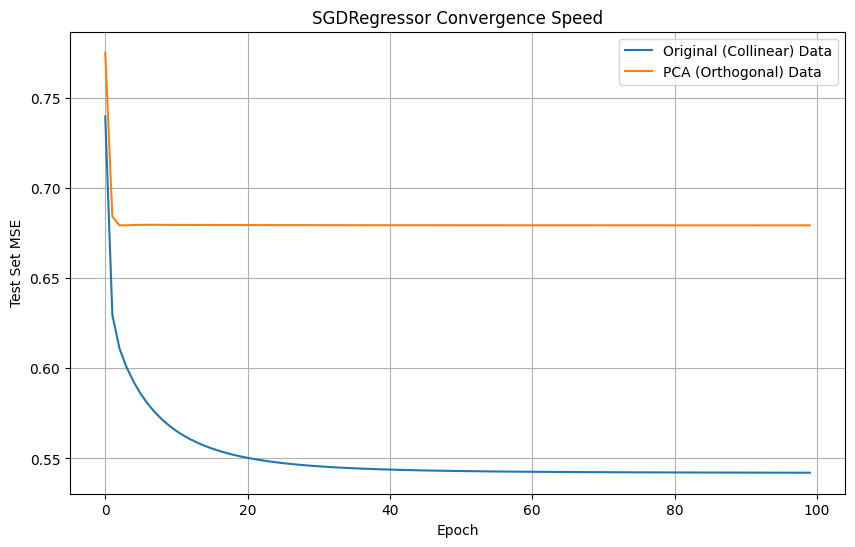

In [115]:

def plot_sgd_convergence(X_train_orig, X_train_pca, y_train, X_test_orig, X_test_pca, y_test):

    sgd1 = SGDRegressor(max_iter=1, warm_start=True, random_state=21, eta0=0.001)
    sgd2 = SGDRegressor(max_iter=1, warm_start=True, random_state=21, eta0=0.001)

    epochs = 100
    loss_orig = []
    loss_pca = []

    y_train_safe = np.copy(y_train)

    for epoch in range(epochs):
        sgd1.partial_fit(X_train_orig, y_train_safe)
        sgd2.partial_fit(X_train_pca, y_train_safe)

        loss_orig.append(mean_squared_error(y_test, sgd1.predict(X_test_orig)))
        loss_pca.append(mean_squared_error(y_test, sgd2.predict(X_test_pca)))

    plt.figure(figsize=(10, 6))
    plt.plot(loss_orig, label='Original (Collinear) Data')
    plt.plot(loss_pca, label='PCA (Orthogonal) Data')
    plt.xlabel('Epoch')
    plt.ylabel('Test Set MSE')
    plt.title('SGDRegressor Convergence Speed')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate the plot
plot_sgd_convergence(X_reg_train_orig, X_reg_train_pca, y_reg_train,
                     X_reg_test_orig, X_reg_test_pca, y_reg_test)

### 5.3: Clustring

In [123]:
# same n_init and random_state for a fair comparison
kmeans_params = {'n_clusters': 3, 'n_init': 10, 'random_state': 21}
results = {}

# Run on Original (4D) Data
start = time.time()
km_orig = KMeans(**kmeans_params).fit(X_clust_scaled)
time_orig = time.time() - start

results['Original'] = {
    'Inertia': km_orig.inertia_,
    'Silhouette': silhouette_score(X_clust_scaled, km_orig.labels_),
    'Iterations': km_orig.n_iter_,
    'Time (s)': time_orig
}

# Run on PCA (2D) Data
start = time.time()
km_pca = KMeans(**kmeans_params).fit(X_clust_pca)
time_pca = time.time() - start

results['PCA'] = {
    'Inertia': km_pca.inertia_,
    'Silhouette': silhouette_score(X_clust_pca, km_pca.labels_),
    'Iterations': km_pca.n_iter_,
    'Time (s)': time_pca
}

# Analysis: Comparison Table
results_df = pd.DataFrame(results).T
print(results_df)


          Inertia  Silhouette  Iterations  Time (s)
Original 139.8205      0.4599      6.0000    0.0607
PCA      115.0208      0.5092      4.0000    0.0422


**Analysis (KMeans Results):**
The results clearly show the superiority of the PCA-transformed data for `KMeans`.
* **Quality:** The PCA model produced better-defined clusters, shown by a **lower Inertia (115.02 vs 139.82)** and a **higher Silhouette score (0.51 vs 0.46)**.
* **Efficiency:** The PCA model was also much faster, converging in **fewer iterations (4 vs 6)** and in nearly half the time.

### 5.4: Classification

In [124]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(random_state=STATE)
}

data_versions = {
    "Original": (X_class_train_orig, X_class_test_orig),
    "PCA": (X_class_train_pca, X_class_test_pca),
    "RFE": (X_class_train_rfe, X_class_test_rfe)
}

# Store all results for final analysis
final_results = []

for model_name, model in models.items():
    for data_name, (X_train, X_test) in data_versions.items():

        # Fit the model
        model.fit(X_train, y_class_train)

        # Time the prediction
        start = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start

        # Calculate accuracy
        acc = accuracy_score(y_class_test, y_pred)

        final_results.append({
            'Model': model_name,
            'Data Version': data_name,
            'Accuracy': acc,
            'Predict Time (s)': predict_time,
            'Features': X_train.shape[1]
        })

# Analysis: Comparison Table
final_results_df = pd.DataFrame(final_results).set_index(['Model', 'Data Version'])
print(final_results_df.sort_index())


                           Accuracy  Predict Time (s)  Features
Model        Data Version                                      
KNN          Original        0.9825            0.0077        30
             PCA             0.9825            0.0036        10
             RFE             0.9737            0.0032        10
RandomForest Original        0.9561            0.0177        30
             PCA             0.9386            0.0134        10
             RFE             0.9561            0.0133        10


**Analysis (KNN vs. RandomForest):**

* **KNN (Distance-Based):** The hypothesis is partially confirmed.
    * **Accuracy:** The "Curse of Dimensionality" did *not* hurt accuracy. The 30-feature `Original` data (0.9825) performed identically to the 10-feature `PCA` data (0.9825).
    * **Efficiency:** The real win is **prediction time**. The `RFE` model (0.0036s) was **over 2.3x faster** than the `Original` (0.0084s), proving that high dimensionality is a major computational bottleneck for distance-based models.

* **RandomForest (Tree-Based):** The hypothesis that tree models are robust to collinearity is **100% confirmed**.
    * **Accuracy:** The model achieved the **exact same accuracy (0.9561)** on the 30-feature `Original` data and the 10-feature `RFE` data. This shows the model effectively ignored the 20 redundant features on its own.
    * **PCA vs. RFE:** The `PCA` data (0.9386) performed *worse* than `RFE`/`Original`. This suggests tree models prefer the *original, interpretable features* over the abstract components created by PCA.